# Cohort Analysis

In [55]:
# Import important libraries 
import pandas as pd 
import numpy as np 

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt

# Import machine learning libraries
from sklearn.model_selection import train_test_split

## Load Dataset

In [56]:
df = pd.read_csv("../Cohort_Analysis/Dataset_ecommerce.csv")
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [57]:
# Descriptive Statistics
df.describe(include='all')

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [58]:
# Check for percentage of missing values
(df.isnull().mean() * 100).round(2)

InvoiceNo       0.00
InvoiceDate     0.00
CustomerID     24.93
StockCode       0.00
Description     0.00
Quantity        0.00
UnitPrice       0.00
Country         0.00
dtype: float64

In [59]:
# Drop missing values
df.dropna(inplace=True)

# Check for missing values
df.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [60]:
# Check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [61]:
# Convert the datatype of the InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


## Exploratory Data Analysis

*Analysis by Country*

In [65]:
quantity_by_country = df.groupby(['Country'])['Quantity'].sum().reset_index()
quantity_by_country = quantity_by_country.sort_values("Quantity", ascending=False).reset_index()
quantity_by_country.head()

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229
3,15,Nigeria,739708
4,9,Libya,739206


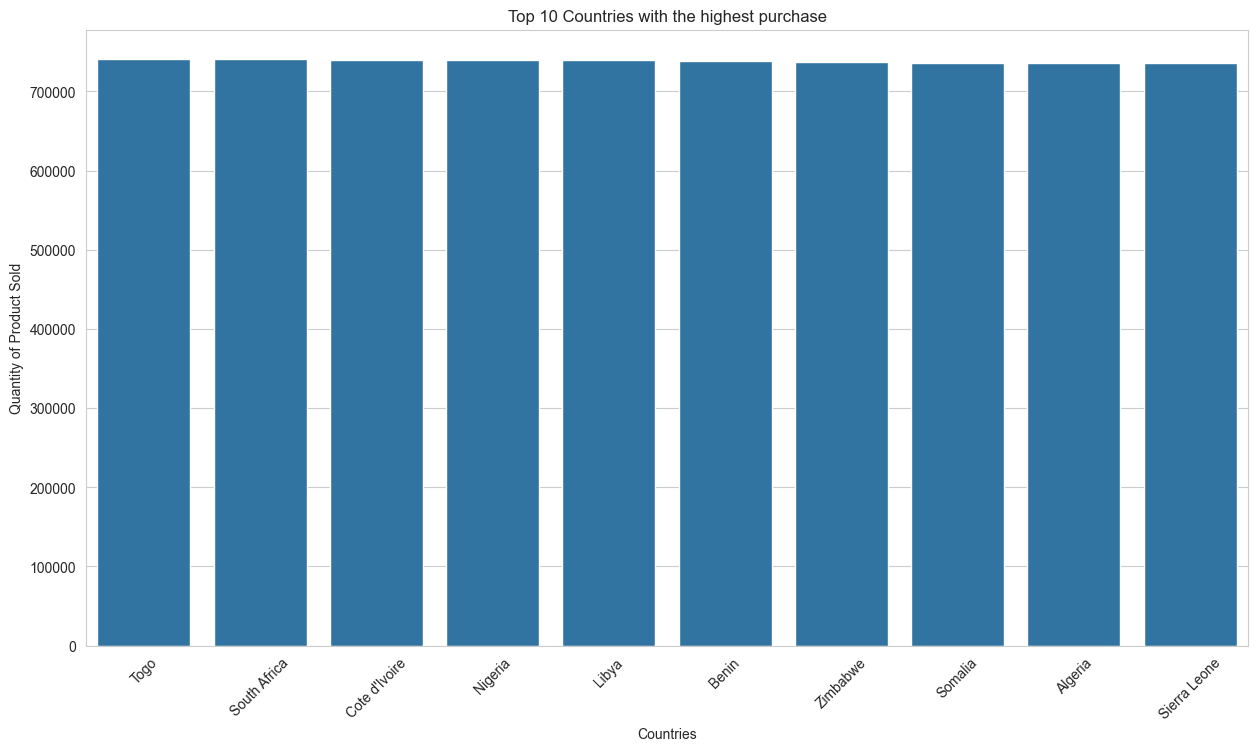

In [70]:
# Top 10 Countries with the highest quantity of items sold
top_10_country = quantity_by_country.head(10)

# Visualize
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Country', y='Quantity', data=top_10_country)
plt.title('Top 10 Countries with the highest purchase')
plt.xlabel('Countries')
plt.ylabel('Quantity of Product Sold')
plt.xticks(rotation=45)
plt.show()

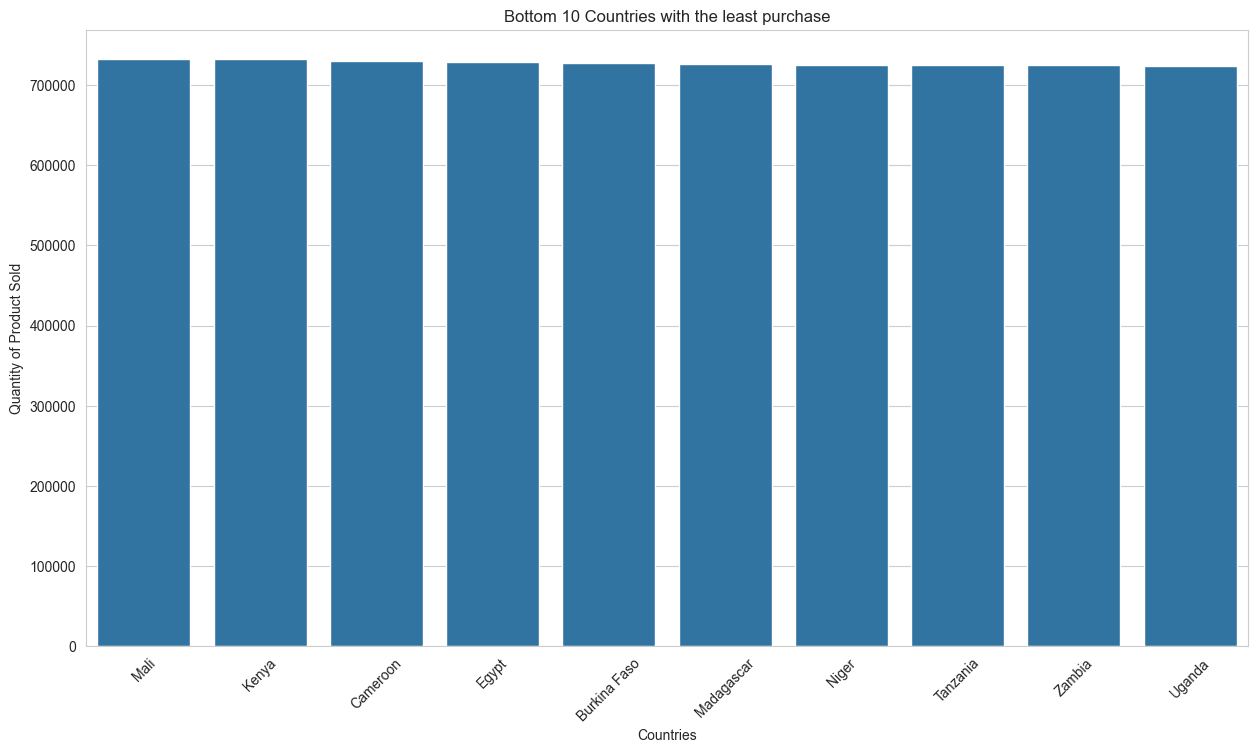

In [68]:
# Least 10 Countries with the lowest quantity of items sold
least_10_country = quantity_by_country.tail(10)

# Visualize
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Country', y='Quantity', data=least_10_country)
plt.title('Bottom 10 Countries with the least purchase')
plt.xlabel('Countries')
plt.ylabel('Quantity of Product Sold')
plt.xticks(rotation=45)
plt.show()

*Analysis fo countries and number of customers*

In [71]:
# Countries with the highest number of customers
customer_by_country = df.groupby(['Country'])['CustomerID'].nunique().reset_index()
customer_by_country = customer_by_country.sort_values("CustomerID", ascending=False).reset_index()
customer_by_country.head()

,index,Country,CustomerID
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053
3,15,Nigeria,3051
4,2,Burkina Faso,3049
